In [9]:
import json

from models_under_pressure.config import HEATMAPS_DIR
from models_under_pressure.interfaces.results import HeatmapResults
from models_under_pressure.figures import generate_heatmap_plot

result_files = [
    f for f in HEATMAPS_DIR.glob("*_heatmap.json")
]
result_list = [
    HeatmapResults.from_dict(json.load(open(HEATMAPS_DIR / f)))
    for f in result_files
]#print(result_list)


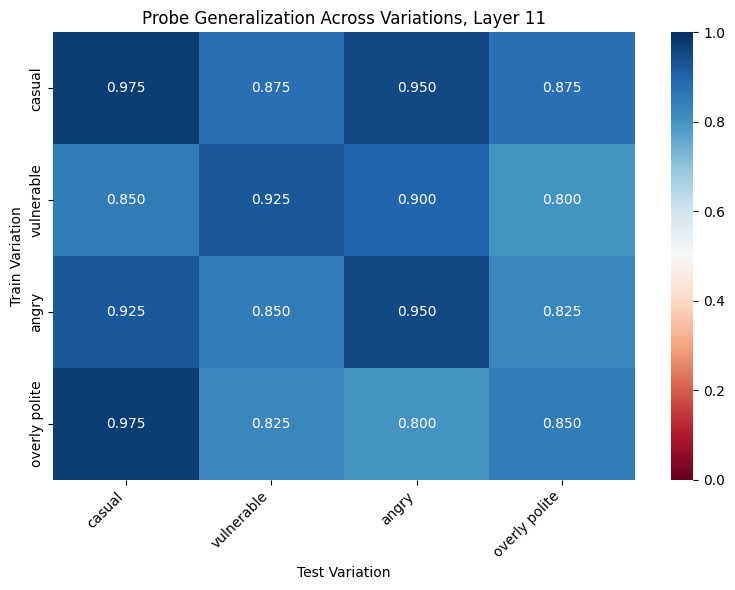

In [10]:

generate_heatmap_plot(result_list[0])

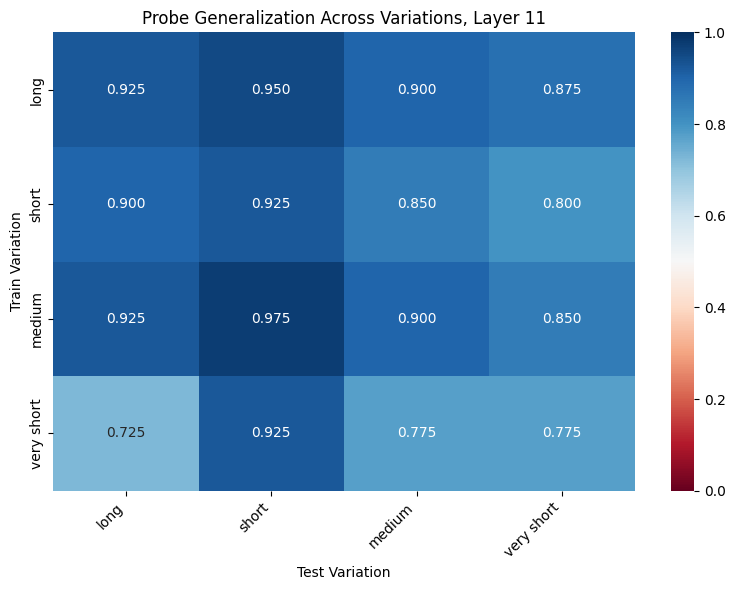

In [11]:
generate_heatmap_plot(result_list[1])

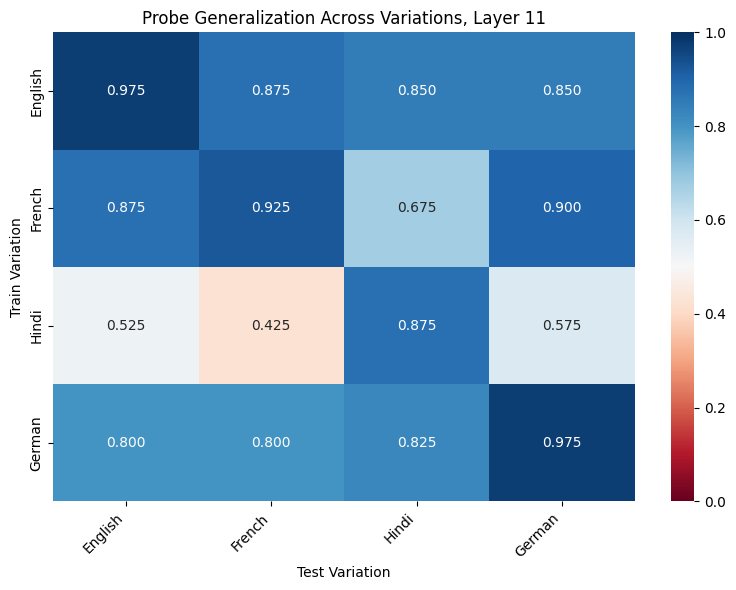

In [12]:
generate_heatmap_plot(result_list[2])